# Data Projection For NS-Sec data

## PCA

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [89]:
import pandas as pd

In [91]:
df=pd.read_excel('./2011/Projection/General_processed_2011.xlsx')
df

,Date,Local Authorities District,Sex,Geo Code,General Health Type,"L1, L2 and L3: Higher managerial, administrative and professional occupations","L4, L5 and L6: Lower managerial, administrative and professional occupations",L7: Intermediate occupations,L8 and L9: Small employers and own account workers,L10 and L11: Lower supervisory and technical occupations,L12: Semi-routine occupations,L13: Routine occupations,L14.1 and L14.2: Never worked and long-term unemployed,L15: Full-time students,label
0,2011,Adur,Females,E07000223,Very good or good health,1224,4775,4688,1195,805,3854,1433,615,1175,0
1,2011,Adur,Males,E07000223,Very good or good health,2327,4009,1429,3163,2095,1807,1958,451,1174,1
2,2011,Allerdale,Females,E07000026,Very good or good health,1633,6849,5058,2518,1491,6735,3272,1126,1801,0
3,2011,Allerdale,Males,E07000026,Very good or good health,3586,5256,1465,4360,4281,3649,4744,855,1602,1
4,2011,Amber Valley,Females,E07000032,Very good or good health,2376,8825,7354,2189,1852,7110,4583,1290,2490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2011,Caerphilly,Females,W06000018,Fair health,269,2008,2378,594,929,3814,3315,1682,223,2
2084,2011,Blaenau Gwent,Females,W06000019,Fair health,76,790,743,222,393,1623,1435,847,88,2
2085,2011,Torfaen,Females,W06000020,Fair health,134,1139,1185,290,530,2005,1532,724,116,2
2086,2011,Monmouthshire,Females,W06000021,Fair health,249,1429,1191,557,369,1507,940,599,61,2


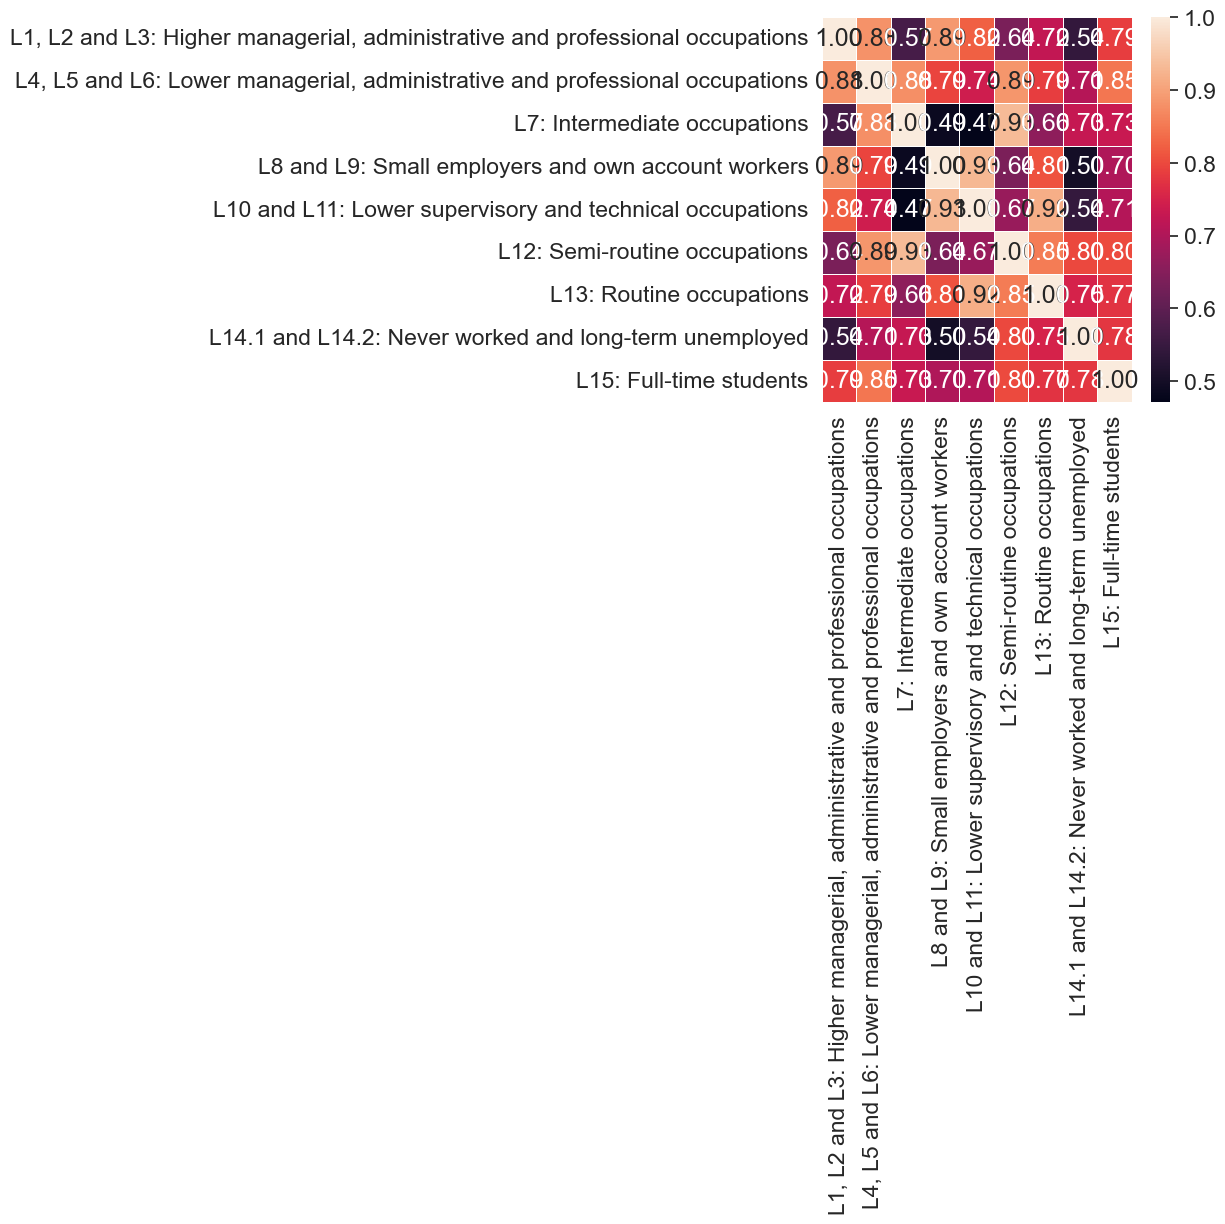

In [95]:
original_data=df.loc[:,'L1, L2 and L3: Higher managerial, administrative and professional occupations':'L15: Full-time students']
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(original_data.corr(),annot=True, linewidths=0.5,fmt='.2f',ax=ax)
plt.show()

In [ ]:

# scaler = StandardScaler()
scaler = MinMaxScaler()
data = scaler.fit_transform(original_data)
data = pd.DataFrame(data, columns=original_data.columns)
data

In [25]:
data_T=data.T
covariance=np.cov(data_T)
eval, evec=np.linalg.eig(covariance)

In [26]:
print(eval)

[5.26482618e-02 7.31678359e-03 3.29567828e-03 1.71931088e-03
 6.14148357e-04 4.77343267e-04 1.59337179e-04 7.58837671e-05
 6.65464687e-05]


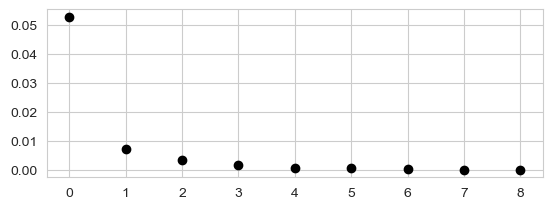

In [27]:
plt.figure()
plt.subplot(211)
plt.plot(eval,'ok')

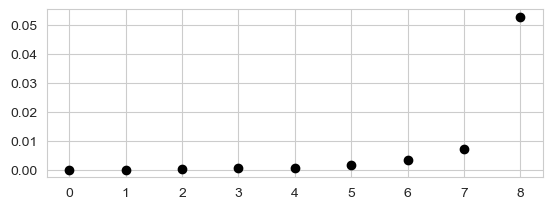

array([[-0.17280869, -0.30506001,  0.25445261, -0.33120887,  0.32477509,
        -0.09616344,  0.51274079,  0.38741375, -0.41822398],
       [ 0.39784224,  0.62808862, -0.2028166 , -0.00781916,  0.0570473 ,
         0.21977747,  0.36337733, -0.15608348, -0.44504928],
       [-0.51398425, -0.3098457 , -0.3903038 ,  0.02082373, -0.09441081,
         0.2801966 ,  0.13574062, -0.54441953, -0.29121037],
       [-0.18663897,  0.01035687,  0.13404803,  0.73786923, -0.2069578 ,
         0.24660859, -0.06517265,  0.42779505, -0.33426837],
       [ 0.35399844, -0.32178786, -0.54788339, -0.25249401, -0.11075327,
         0.09015903, -0.40105351,  0.36229239, -0.30775577],
       [ 0.39279138, -0.30471643,  0.60719586, -0.0386462 , -0.10202492,
         0.18366833, -0.24825068, -0.40264682, -0.33880154],
       [-0.46496154,  0.45138483,  0.16077295, -0.31342052,  0.17329863,
        -0.02067521, -0.57035207,  0.03990854, -0.31405108],
       [ 0.12688605, -0.11798169, -0.16901275,  0.42554281,  0

In [28]:
eval, evec=np.linalg.eigh(covariance)
plt.subplot(212)
plt.plot(eval,'ok')
plt.show()
evec

In [29]:
sorted_eval = np.sort(eval)
eval = sorted_eval[::-1]  # reverse the order so that it is decreasing
print("Sorted eigenvalues " + str(eval))
ncols=len(data.columns)
print(ncols)

Sorted eigenvalues [5.26482618e-02 7.31678359e-03 3.29567828e-03 1.71931088e-03
 6.14148357e-04 4.77343267e-04 1.59337179e-04 7.58837671e-05
 6.65464687e-05]
9


[0.79321454 0.90345141 0.95310509 0.97900874 0.98826168 0.99545348
 0.9978541  0.99899739 1.        ]


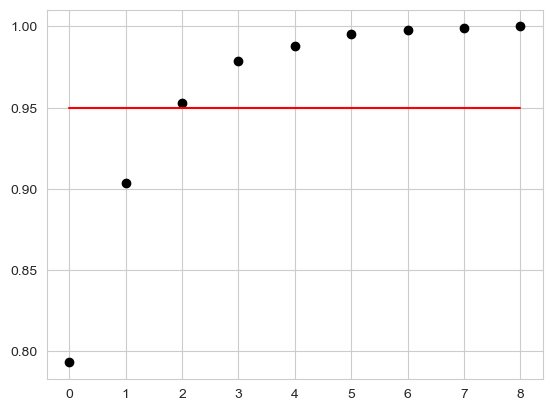

In [30]:
cumuleval=np.cumsum(eval)
total=np.sum(eval)
cumuleval=cumuleval/total
print(cumuleval)

plt.figure(3)
plt.plot(cumuleval, 'ok')
xvals = range(ncols)
plt.plot(xvals, 0.95*np.ones(np.shape(eval)), 'r-')
plt.show()

Explained variance ratio [0.79321454 0.11023686]


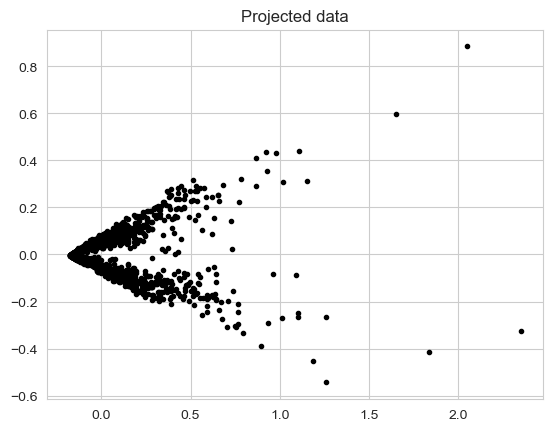

In [47]:
# Now apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
# This should equal the sum of the first two values in the cumulative proportion plot
print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(data)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

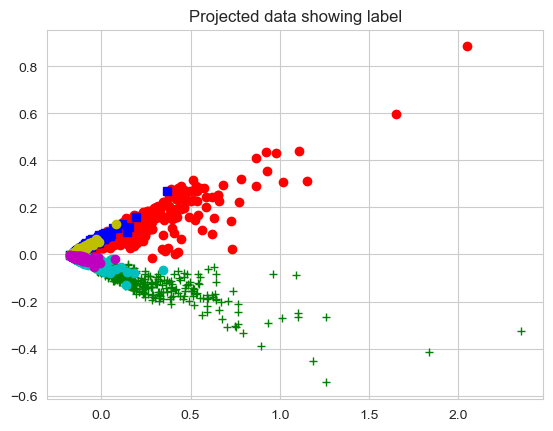

In [48]:
# Now plot the data with a different mark for each label
marks = ('ro', 'g+', 'bs','co','yo','mo')
label = df['label']

plt.figure(6)
for n in range(0, 6, 1) :
    projClass = projX[np.equal(label, n*np.ones(label.shape))]
    plt.plot(projClass[:,0], projClass[:,1], marks[n])

plt.title('Projected data showing label')
plt.show()

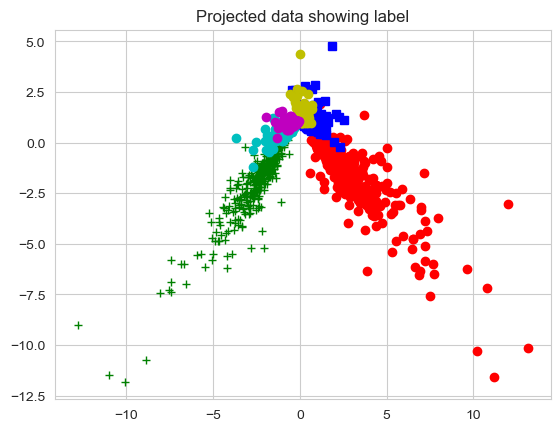

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(data, label)
projX = clf.transform(data)

# Now plot the data with a different mark for each label
marks = ('ro', 'g+', 'bs','co','yo','mo')
plt.figure()
for n in range(0, 6, 1) :
    projClass = projX[np.equal(label, n*np.ones(label.shape))]
    plt.plot(projClass[:,0], projClass[:,1], marks[n])

plt.title('Projected data showing label')
plt.show()

In [46]:
projX.shape

(2088, 5)

## UMAP

In [51]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

RS=1729

In [50]:
data

,"L1, L2 and L3: Higher managerial, administrative and professional occupations","L4, L5 and L6: Lower managerial, administrative and professional occupations",L7: Intermediate occupations,L8 and L9: Small employers and own account workers,L10 and L11: Lower supervisory and technical occupations,L12: Semi-routine occupations,L13: Routine occupations,L14.1 and L14.2: Never worked and long-term unemployed,L15: Full-time students
0,0.035402,0.079682,0.089073,0.036752,0.030672,0.085986,0.039270,0.015987,0.023419
1,0.067305,0.066886,0.027138,0.097378,0.079947,0.040292,0.053657,0.011724,0.023399
2,0.047232,0.114328,0.096104,0.077508,0.056875,0.150297,0.089666,0.029271,0.035895
3,0.103720,0.087717,0.027822,0.134253,0.163445,0.081410,0.130005,0.022226,0.031929
4,0.068722,0.147336,0.139738,0.067373,0.070665,0.158668,0.125593,0.033534,0.049627
...,...,...,...,...,...,...,...,...,...
2083,0.007780,0.033460,0.045173,0.018237,0.035409,0.085093,0.090844,0.043725,0.004445
2084,0.002198,0.013113,0.014101,0.006777,0.014935,0.036185,0.039325,0.022018,0.001754
2085,0.003876,0.018943,0.022501,0.008872,0.020168,0.044712,0.041983,0.018821,0.002312
2086,0.007202,0.023788,0.022615,0.017097,0.014018,0.033595,0.025760,0.015571,0.001216


In [112]:
umap_2d = umap.UMAP(random_state=RS)
umap_2d.fit(data)
embedding=umap_2d.transform(data)
embedding

array([[12.059119 ,  0.673024 ],
       [-1.3201157,  1.5391397],
       [11.55113  , -1.1456599],
       ...,
       [14.26442  ,  8.566961 ],
       [13.410924 ,  9.781295 ],
       [14.317718 ,  7.439682 ]], dtype=float32)

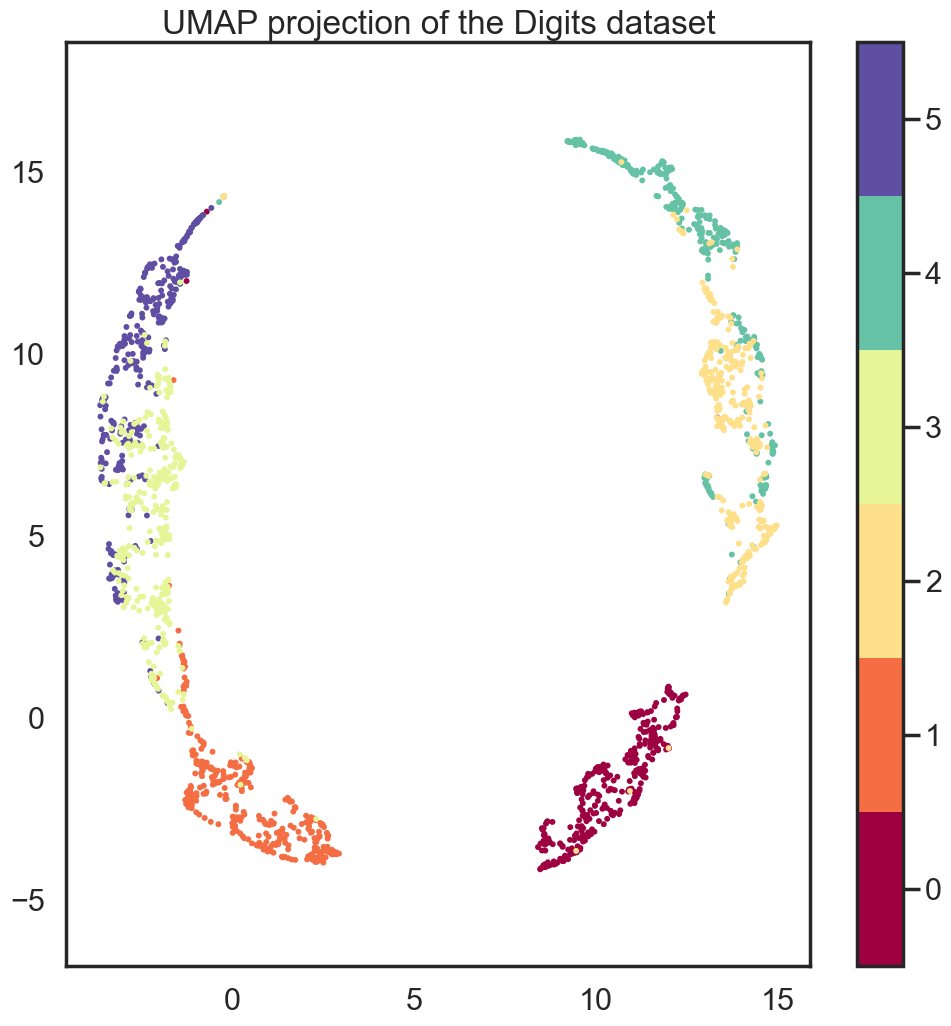

In [113]:
plt.figure(figsize=(12, 12))

plt.scatter(embedding[:, 0], embedding[:, 1], c=label, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [118]:
em=pd.DataFrame(embedding)
df_out=pd.concat([df['Local Authorities District'],em,label],axis=1)
df_out.to_excel('./2011/Projection/NS-Sec_projections_UMAP.xlsx')

In [77]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', init = 'spectral'):
    fit = umap.UMAP(
        random_state = 42,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        init = init
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=label,s=6)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=4)
    plt.title(title, fontsize=18)

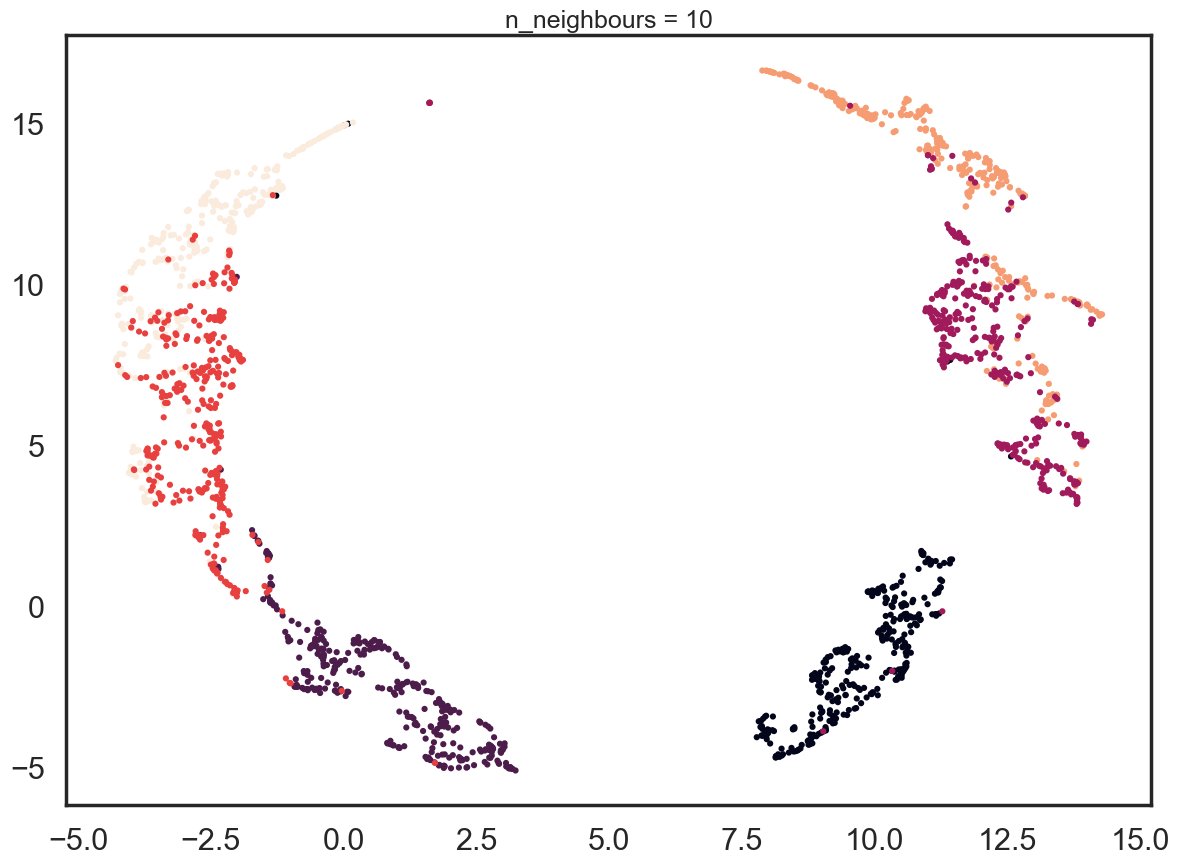

In [99]:
# Exploration of parameters
import seaborn as sns

sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
np.random.seed(42)
# data = np.random.rand(800, 4)

umap_fit=umap.UMAP(random_state=RS)
umap_fit.fit(data)
u=umap_fit.transform(data)
n=10
draw_umap(n, title='n_neighbours = {}'.format(n))

## TSNE

In [81]:
import time
import pandas as pd
import numpy as np
import fashion_scatter as fs
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

RS = 1729; # Fix the random state for t-SNE. This makes the lab results reproducible.

[[ 21.180693   37.74508  ]
 [ 24.146536  -53.459423 ]
 [ 36.631603   33.30311  ]
 ...
 [-11.200484   21.390455 ]
 [-36.007675   54.53222  ]
 [ 12.0107975  19.676287 ]]


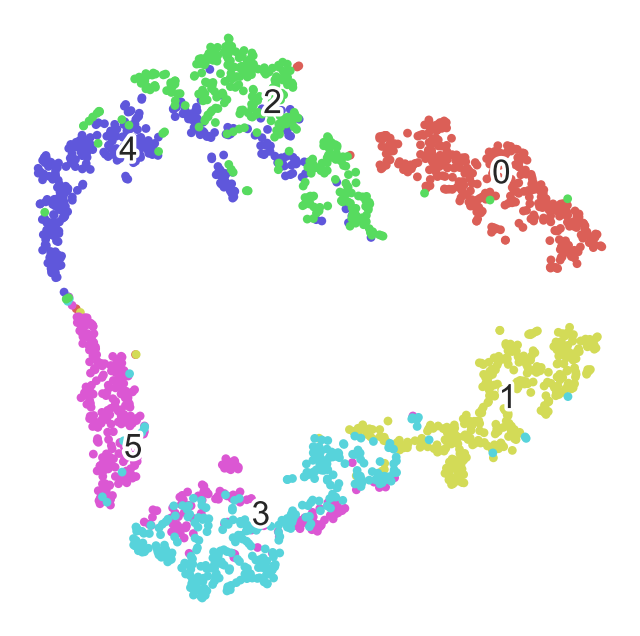

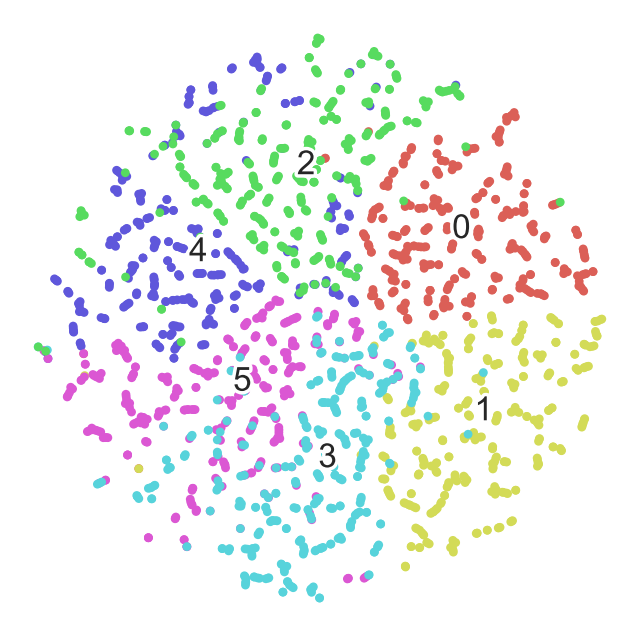

In [87]:
from sklearn.manifold import TSNE
from fashion_scatter import fashion_scatter
pca_50=PCA(n_components = 5)
pca_result_50 = pca_50.fit_transform(data)
fashion_pca_tsne = TSNE(random_state=RS).fit_transform(data)
fashion_scatter(fashion_pca_tsne, label)

fashion_pca_tsne_2 = TSNE(random_state=RS, perplexity=2).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne_2, label)
print(fashion_pca_tsne_2)